# Heatmap

It is used for representing the tabular data in such a way that each cell is filled with a color whose intensity depehds on numeric value of the cell. 

### Importing libraries

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#setting style
sns.set_style('darkgrid')

### Loading data

In [2]:
cars=sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Grouping the data based on origin

In [3]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [4]:
#Unstacking the data
(cars.groupby('origin').cylinders.value_counts().unstack())

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,63.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,72.0,NaN,74.0,103.0


In [5]:
#Filling null values with 0
origin_cyl=(cars.groupby('origin').cylinders.value_counts().unstack().fillna(0))
origin_cyl

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


### Creating a heatmap

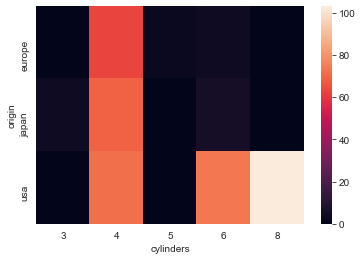

In [6]:
sns.heatmap(origin_cyl);

In [7]:
#Using NumPy Array
test_array=np.array([[1,2],[3,4]])
test_array

array([[1, 2],
       [3, 4]])

<AxesSubplot:>

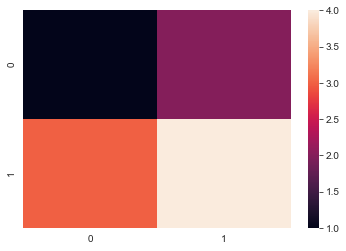

In [8]:
sns.heatmap(test_array)

**Transposing the heatmap**

In [9]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


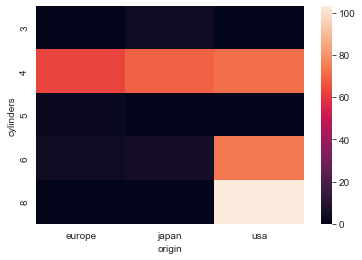

In [10]:
sns.heatmap(origin_cyl.T);

**Correlation with heatmap**

In [11]:
#correlation : variation in variable while other also changes
#accessing the correlation
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


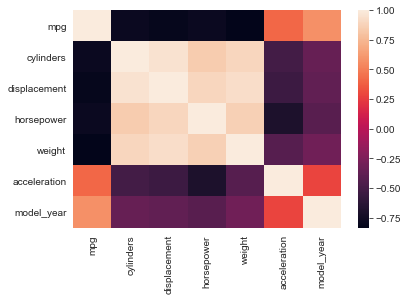

In [12]:
#plotting heatmap
sns.heatmap(cars.corr());

### Color Palette
Seaborn offers 170 different color palette options.<br> We'll start with a sequetial palette.

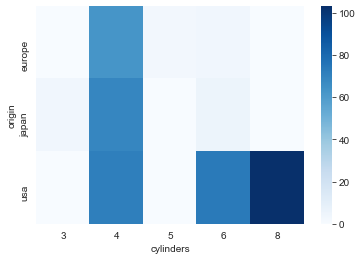

In [13]:
sns.heatmap(origin_cyl, cmap='Blues');

Diverging palette

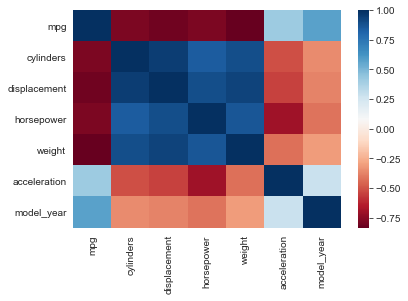

In [14]:
#Color shades varies from red to blue
sns.heatmap(cars.corr(), cmap='RdBu');

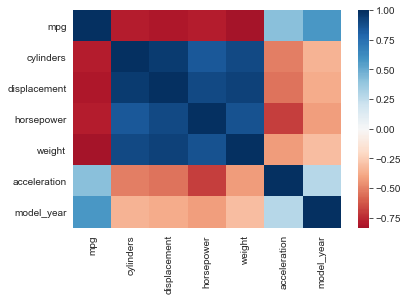

In [15]:
#We can also set center at 0 so that all the shades show dark color at the extermum
sns.heatmap(cars.corr(), cmap='RdBu', center=0);

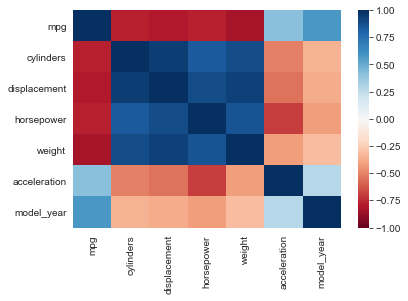

In [16]:
#Setting different values for extremum of the scale than that of the arguement passed
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1);
#-0.75 to 1.00 has been changed to -1.00 to 1.00

### Adding annotations
It is used for showing the value of each cell.

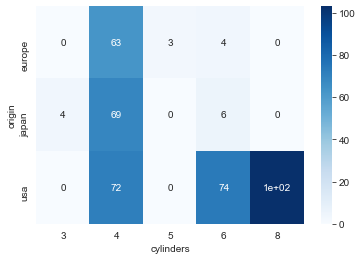

In [17]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

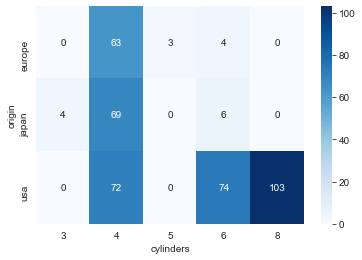

In [18]:
#We can change the format of the annotations
#Changing the number of decimal places
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f'); #zero decimals

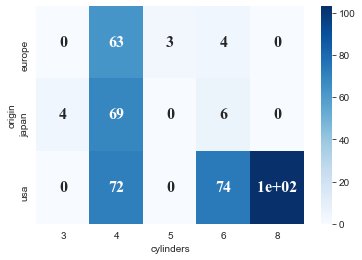

In [19]:
#We can give various arguements of the annotations altogether using annot_kws
sns.heatmap(origin_cyl, cmap='Blues', annot=True,
           annot_kws={'fontsize':16, 'fontweight':'bold','fontfamily':'Times New Roman'}
           );

### Styling

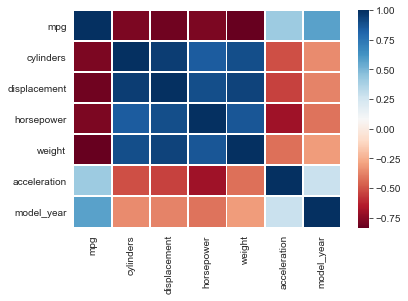

In [20]:
#Changing the linewidth for seperation of cells
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1);

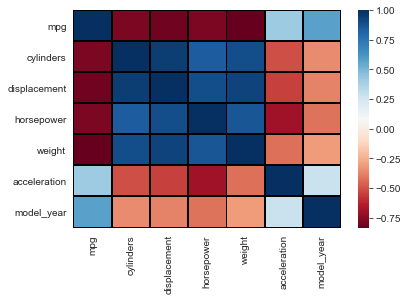

In [21]:
#We can also change the color of the line
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1, linecolor='black');

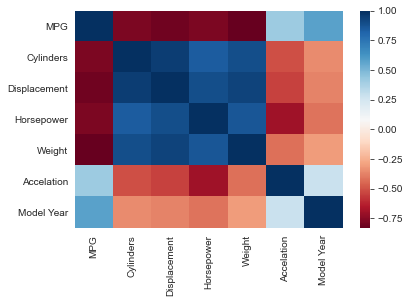

In [22]:
#Changing the ticklabels
labels=['MPG','Cylinders','Displacement','Horsepower','Weight','Accelation','Model Year']
sns.heatmap(cars.corr(), cmap='RdBu',xticklabels=labels, yticklabels=labels);
#We can also turn off the labels by assigning boolean value False

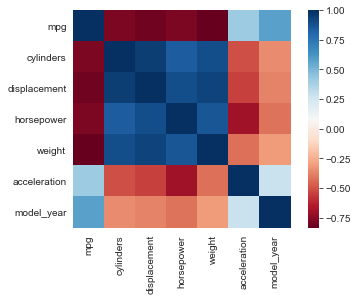

In [23]:
#Changing the size of the heatmap
#Changing of the square
sns.heatmap(cars.corr(), cmap='RdBu', square=True);

The End